In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import cluster
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Importing dataset
column_names = ("Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon","Hillshade_3pm","Horizontal_Distance_To_Fire_Points","Wilderness_Area_01","Wilderness_Area_02","Wilderness_Area_03","Wilderness_Area_04","Soil_Type_01","Soil_Type_02","Soil_Type_03","Soil_Type_04","Soil_Type_05","Soil_Type_06","Soil_Type_07","Soil_Type_08","Soil_Type_09","Soil_Type_10","Soil_Type_11","Soil_Type_12","Soil_Type_13","Soil_Type_14","Soil_Type_15","Soil_Type_16","Soil_Type_17","Soil_Type_18","Soil_Type_19","Soil_Type_20","Soil_Type_21","Soil_Type_22","Soil_Type_23","Soil_Type_24","Soil_Type_25","Soil_Type_26","Soil_Type_27","Soil_Type_28","Soil_Type_29","Soil_Type_30","Soil_Type_31","Soil_Type_32","Soil_Type_33","Soil_Type_34","Soil_Type_35","Soil_Type_36","Soil_Type_37","Soil_Type_38","Soil_Type_39","Soil_Type_40","Cover_Type")
dataset = pd.read_table("covtype.data", sep=",", names=column_names)
dataset_subset = dataset[["Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon","Hillshade_3pm","Horizontal_Distance_To_Fire_Points","Cover_Type"]]
dataset_subset["Cover_Type"] = dataset_subset["Cover_Type"].astype("category")
dataset_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 11 columns):
Elevation                             581012 non-null int64
Aspect                                581012 non-null int64
Slope                                 581012 non-null int64
Horizontal_Distance_To_Hydrology      581012 non-null int64
Vertical_Distance_To_Hydrology        581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Hillshade_3pm                         581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
Cover_Type                            581012 non-null category
dtypes: category(1), int64(10)
memory usage: 44.9 MB


/Users/ellenitoumpas/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


For relationship Elevation versus Aspect



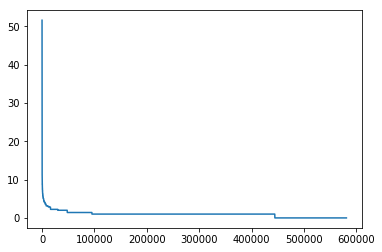

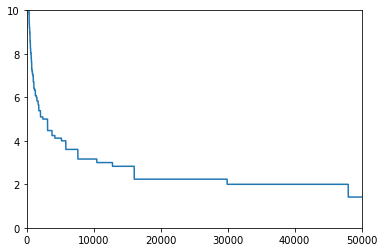

For relationship Elevation versus Slope



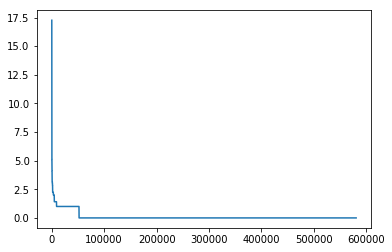

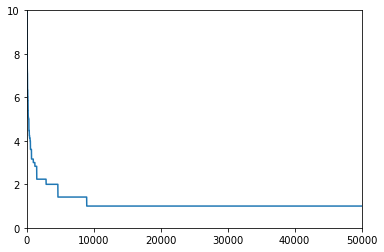

For relationship Elevation versus Horizontal_Distance_To_Hydrology



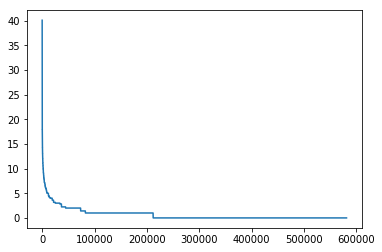

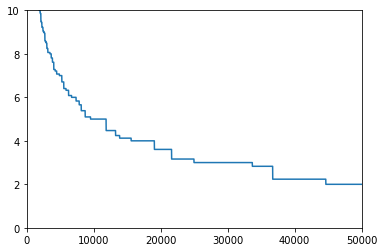

For relationship Elevation versus Vertical_Distance_To_Hydrology



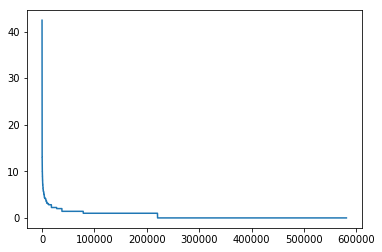

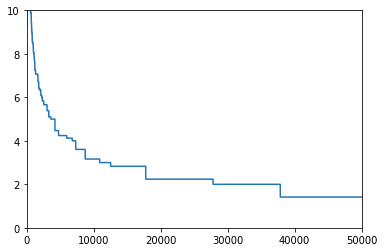

For relationship Elevation versus Horizontal_Distance_To_Roadways



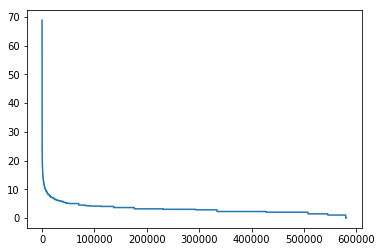

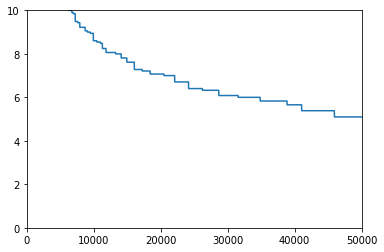

For relationship Elevation versus Hillshade_9am



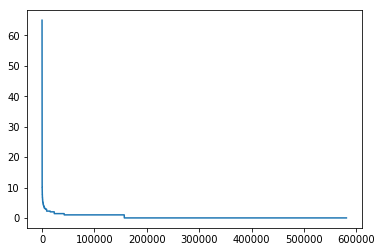

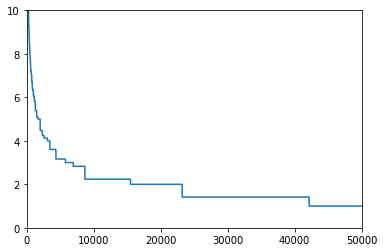

For relationship Elevation versus Hillshade_Noon



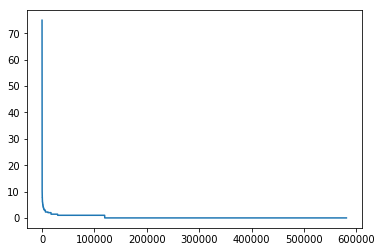

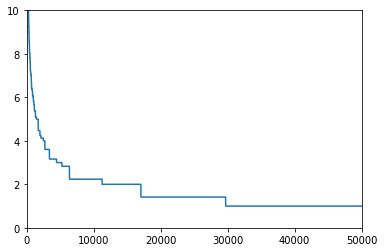

For relationship Elevation versus Hillshade_3pm



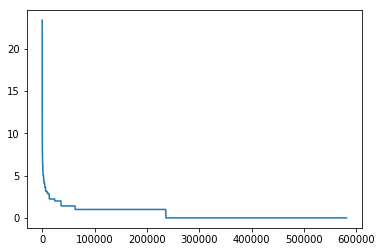

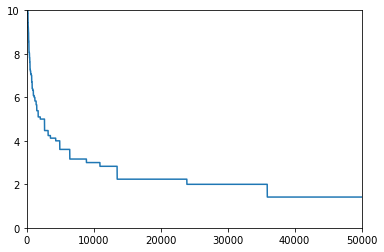

For relationship Elevation versus Horizontal_Distance_To_Fire_Points



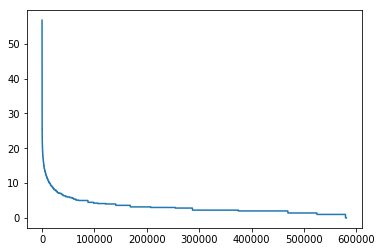

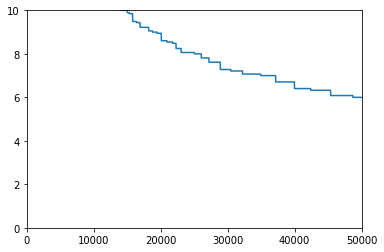

In [14]:
##############################################################################
# INITIALIZING MODEL PARAMETERS
##############################################################################

# TESTING ELEVATION vs ASPECT
dataset_subset

## CHANGE THESE TWO VALUES WHEN TESTING DIFFERENT RELATIONSHIPS
variable_1 = 0
i = 0

for i in range(1,11):
    
    variable_2 = variable_1 + i

    if variable_2 < 10:
               
        # ASSIGN THE VARIABLES BEING TESTED TO THE MODEL OBJECT
        # model reset
 
        model = dataset_subset.iloc[:,[variable_1,variable_2]] 
        
        print ("For relationship "+str(dataset_subset.columns[variable_1])+" versus "+str(dataset_subset.columns[variable_2])+"\n")

        ##############################################################################
        # FIND THE BEST EPS TO USE FOR THIS RELATIONSHIP
        ##############################################################################

        # SET UP THE NN TEST
        nbrs = NearestNeighbors().fit(model)
        distances, indices = nbrs.kneighbors(model)
        distances.shape

        # CHOOSE THE FOURTH NEIGHBOUR DISTANCE
        kDis = distances[:, 4]
        kDis.sort()

        # NOTE FOR ME: Try and understand this line ?
        kDis = kDis[range(len(kDis)-1, 0, -1)]

        # PLOT THE K-DISTANCE GRAPH
        plt.plot(range(0,len(kDis)), kDis)
        plt.show()

        ##############################################################################
        # ZOOM IN TO SEE CURVE
        ##############################################################################
        plt.plot(range(0,len(kDis)), kDis)
        plt.xlim(0,50000)
        plt.ylim(0,10)
        plt.show()

    else:
        break
       